# ANOVA

### testeo de más de dos muestras

**ANOVA** = Análisis de la varianza, es una técnica que permite comparar tres o más medias de distintas muestras independientes.


Las hipótesis son:

$H0 : \mu_1=\mu_2=\mu_3=\ldots=\mu_n$

$H1 :$ Al menos una es diferente

Los p_values se sacan con el F-test (F de Snedecor), comparando varianzas. Lo que se busca es una diferencia significativa en al menos uno de los grupos.

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd
import numpy as np

from scipy.stats import f_oneway, norm, f, chi2, chi2_contingency

import statsmodels.api as sm
from statsmodels.formula.api import ols

import warnings
warnings.simplefilter('ignore')

##### F de Snedecor

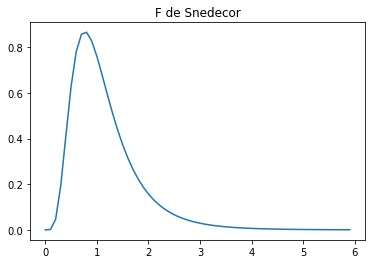

In [2]:
x=[i*.1 for i in range(60)]

plt.plot(x, f(15, 15).pdf(x))
plt.title('F de Snedecor');

##### F-test

In [3]:
x=[i*.1 for i in range(-60, 60)]

y1=[norm.pdf(x, -3, 1) for x in x]
y2=[norm.pdf(x, 1, 2) for x in x]
y3=[norm.pdf(x, 4, 1.5) for x in x]

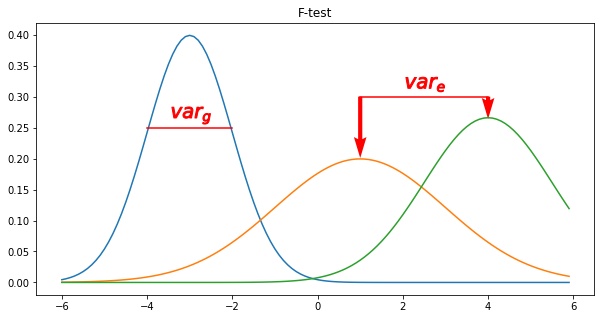

In [4]:
plt.figure(figsize=(10,5))

plt.plot(x, y1)
plt.plot(x, y2)
plt.plot(x, y3)

plt.plot(-3, 0.27, marker='$var_g$', color='r', ms=40)
plt.plot(2.5, 0.32, marker='$var_e$', color='r', ms=40)

plt.plot([-4,-3,-2], [.25, .25, .25], color='r')
plt.plot([1,2,3,4], [.3, .3, .3, .3], color='r')

plt.quiver(1, 0.3, 0, -1.1, color='r', scale=10)
plt.quiver(4, 0.3, 0, -0.4, color='r', scale=10)

plt.title('F-test');

$F-test =$ Varianza entre los grupos / Varianza del grupo

$F-test = \frac{\sigma_e^2}{\sigma_g^2}$

# Ejemplo Plantas

**ANOVA One-Way** : Una variable independiente y una dependiente, similaridad basada en la media y en el f_score.


Supongamos que tenemos dos fertilizantes distintos y probamos su eficacia. Se tienen 3 grupos, el grupo de control (no se aplica fertilizante), y un grupo para cada uno de los fertilizantes.

Las hipótesis son:

$H0 : \mu_1=\mu_2=\mu_3$  (no hay diferencia significativa entre los grupos)

$H1 :$ Al menos una es diferente  (existe diferencia significativa en al menos un grupo)

In [5]:
df=pd.read_csv('data/PlantGrowth.csv')
df.head()

,Unnamed: 0,weight,group
0,1,4.17,ctrl
1,2,5.58,ctrl
2,3,5.18,ctrl
3,4,6.11,ctrl
4,5,4.50,ctrl


In [6]:
df.group.unique()

array(['ctrl', 'trt1', 'trt2'], dtype=object)

In [7]:
df=df[['weight', 'group']]

grupos=df.group.unique()

In [8]:
data={g : df.weight[df.group==g] for g in grupos}

data

{'ctrl': 0    4.17
 1    5.58
 2    5.18
 3    6.11
 4    4.50
 5    4.61
 6    5.17
 7    4.53
 8    5.33
 9    5.14
 Name: weight, dtype: float64, 'trt1': 10    4.81
 11    4.17
 12    4.41
 13    3.59
 14    5.87
 15    3.83
 16    6.03
 17    4.89
 18    4.32
 19    4.69
 Name: weight, dtype: float64, 'trt2': 20    6.31
 21    5.12
 22    5.54
 23    5.50
 24    5.37
 25    5.29
 26    4.92
 27    6.15
 28    5.80
 29    5.26
 Name: weight, dtype: float64}

In [9]:
f_score, p_value = f_oneway(data['ctrl'], data['trt1'], data['trt2'])

print (f_score, p_value)

4.846087862380136 0.0159099583256229


**Conclusion**

$p_v < 0.05$, se rechaza H0. Existe una diferencia significativa en al menos un grupo.

In [10]:
data['ctrl'].mean()

5.031999999999999

In [11]:
data['trt1'].mean()

4.661

In [12]:
data['trt2'].mean()

5.526

# Ejemplo Ciudades

Se tiene un rating de 6 ciudades diferentes.

Las hipótesis son:

$H0 : \mu_1=\ldots=\mu_6$  (no hay diferencia significativa entre las ciudades)

$H1 :$ Al menos una es diferente  (existe diferencia significativa en al menos una ciudad)

In [13]:
rate=pd.read_csv('data/rate_by_city.csv')

rate.head()

,Rate,City
0,13.75,1
1,13.75,1
2,13.50,1
3,13.50,1
4,13.00,1


In [14]:
rate.City.unique()

array([1, 2, 3, 4, 5, 6])

In [15]:
rate['city_count']=rate.groupby('City').cumcount()

rate.head()

,Rate,City,city_count
0,13.75,1,0
1,13.75,1,1
2,13.50,1,2
3,13.50,1,3
4,13.00,1,4


In [16]:
rate_pivot=rate.pivot(columns='City', values='Rate', index='city_count')
rate_pivot

City,1,2,3,4,5,6
city_count,,,,,,
0,13.75,14.25,14.00,15.00,14.50,13.50
1,13.75,13.00,14.00,14.00,14.00,12.25
2,13.50,12.75,13.51,13.75,14.00,12.25
3,13.50,12.50,13.50,13.59,13.90,12.00
4,13.00,12.50,13.50,13.25,13.75,12.00
5,13.00,12.40,13.25,12.97,13.25,12.00
6,13.00,12.30,13.00,12.50,13.00,12.00
7,12.75,11.90,12.50,12.25,12.50,11.90
8,12.50,11.90,12.50,11.89,12.45,11.90


In [17]:
# f_oneway(rate_pivot[1], rate_pivot[2].....

f_oneway(*[rate_pivot[i] for i in range(1, 7)])  # entrada n muestras

F_onewayResult(statistic=4.8293848737024, pvalue=0.001174551414504048)

**Conclusion**

$p_v < 0.05$, se rechaza H0. Existe uns diferencia significativa en al menos una ciudad.

In [18]:
# con statsmodels

formula='Rate ~ C(City)'

modelo=ols(formula=formula, data=rate).fit()

anova_table=sm.stats.anova_lm(modelo, typ=1)

anova_table

,df,sum_sq,mean_sq,F,PR(>F)
C(City),5.0,10.945667,2.189133,4.829385,0.001175
Residual,48.0,21.758133,0.453294,NaN,NaN


In [19]:
modelo

##### F-test a mano

In [20]:
data=np.array([[1,2,3], [4,5,6], [7,8,9]]).T
data

array([[1, 4, 7],
       [2, 5, 8],
       [3, 6, 9]])

In [21]:
n=data.shape[0]
m=data.shape[1]

media=data.mean()

col_medias=data.mean(axis=0)

s_c_entre_grupos=(((col_medias-media)**2)*n).sum()
dof_sceg=m-1

s_c_grupo=((data-col_medias)**2).sum()
dof_scg=m*(n-1)

In [22]:
f_score=(s_c_entre_grupos/dof_sceg)/(s_c_grupo/dof_scg)
f_score

27.0

In [23]:
1 - f(dof_sceg, dof_scg).cdf(f_score)  # p_value

0.0010000000000000009

##### con scipy

In [24]:
f_oneway(data[:, 0], data[:, 1], data[:, 2])

F_onewayResult(statistic=27.0, pvalue=0.0010000000000000002)

# Ejemplo Campo


**ANOVA Two-Way** : Dos variables independientes categoricas y una dependiente continua.


Supongamos que se tienen datos de produccion de un campo, y ademas los datos del tipo de fertilizante y cantidad de agua usada.


Las hipótesis son:

$H0 : \mu_1=\mu_2=\ldots=\mu_n$  (no hay diferencia significativa entre campos)

$H1 :$ Al menos una es diferente  (existe diferencia significativa en al menos un campo)

In [25]:
df=pd.read_csv('data/crop_yield.csv')
df.head()

,Fert,Water,Yield
0,A,High,27.4
1,A,High,33.6
2,A,High,29.8
3,A,High,35.2
4,A,High,33.0


In [26]:
df.Fert.unique()

array(['A', 'B'], dtype=object)

In [27]:
df.Water.unique()

array(['High', 'Low'], dtype=object)

In [28]:
df.Yield.unique()

array([27.4, 33.6, 29.8, 35.2, 33. , 34.8, 27. , 30.2, 30.8, 26.4, 32. ,
       32.2, 26. , 33.4, 26.8, 23.2, 29.4, 19.4, 23.8])

In [29]:
modelo=ols('Yield ~ C(Fert)+C(Water)', df).fit()
modelo.fvalue

5.430482726711912

In [30]:
modelo.f_pvalue

0.015008885925143397

In [31]:
res=sm.stats.anova_lm(modelo, typ=2)
res

,sum_sq,df,F,PR(>F)
C(Fert),69.192,1.0,5.669070,0.029228
C(Water),63.368,1.0,5.191895,0.035887
Residual,207.488,17.0,NaN,NaN


# MANOVA (ANOVA Multivariante)

In [32]:
from statsmodels.multivariate.manova import MANOVA

In [33]:
df=pd.read_csv('data/iris.csv')
df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [34]:
df.variety.unique()

array(['Setosa', 'Versicolor', 'Virginica'], dtype=object)

In [35]:
df.columns=df.columns.str.replace('.', '_')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [36]:
manova=MANOVA.from_formula('sepal_length + sepal_width + petal_length + petal_width ~ C(variety)',
                           data=df)

print (manova.mv_test())

                   Multivariate linear model
                                                                
----------------------------------------------------------------
       Intercept         Value  Num DF  Den DF   F Value  Pr > F
----------------------------------------------------------------
          Wilks' lambda  0.0170 4.0000 144.0000 2086.7720 0.0000
         Pillai's trace  0.9830 4.0000 144.0000 2086.7720 0.0000
 Hotelling-Lawley trace 57.9659 4.0000 144.0000 2086.7720 0.0000
    Roy's greatest root 57.9659 4.0000 144.0000 2086.7720 0.0000
----------------------------------------------------------------
                                                                
----------------------------------------------------------------
       C(variety)        Value  Num DF  Den DF   F Value  Pr > F
----------------------------------------------------------------
          Wilks' lambda  0.0234 8.0000 288.0000  199.1453 0.0000
         Pillai's trace  1.1919 8.0000 290.00

# $\chi^2$

**ji-dos, chi-dos, chi-cuadrado..., para una poblacion que tenga dos variables categoricas**

**¿Existe asociacion significativa entre las dos?  (H0: No, H1: Si)**

In [37]:
df=pd.read_csv('data/chi-test.csv')
df.head()

,Gender,Like Shopping?
0,Male,No
1,Female,Yes
2,Male,Yes
3,Female,Yes
4,Female,Yes


In [38]:
contin_table=pd.crosstab(df.Gender, df['Like Shopping?'])
contin_table

Like Shopping?,No,Yes
Gender,,
Female,2,3
Male,2,2


In [39]:
chi2_contingency(contin_table)

(0.1406249999999999, 0.7076604666545525, 1, array([[2.22222222, 2.77777778],
        [1.77777778, 2.22222222]]))

In [40]:
chi_2, pval, dof, ex = chi2_contingency(contin_table)

pval

0.7076604666545525

In [41]:
# a mano

chi_square=([(f-e)**2./e for f,e in zip(contin_table.values, ex)])

chi_statistic=sum(chi_square)

p_value=1-chi2.cdf(x=chi_statistic, df=dof)
p_value

array([0.82306327, 0.84148058])

**Conclusion**

$p_v > 0.05$, no se rechaza H0, no existe asociacion significativa entre los grupos.

# Regresion Lineal

**Ecuacion de la recta**

$$y = m·x+b$$

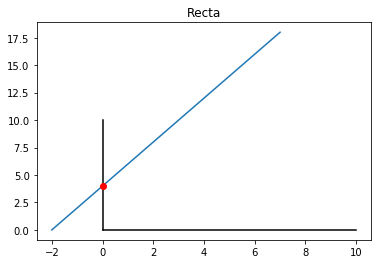

In [42]:
x=[i for i in range(-2, 8)]

m=2
b=4

y=[m*x+b for x in x]

plt.plot(x, y)
plt.plot([0,0], [0,10], color='black')
plt.plot([0,10], [0,0], color='black')
plt.plot(0, b, 'ro')
plt.title('Recta');

**Generalizacion de la ecuacion de la recta**

$$y=\beta_0+\beta_1x_1+\beta_2x_2+\beta_3x_3+\ldots+\beta_nx_n$$

El objetivo de la regresion lineal es obtener los $\beta$:
+ Algebraicamente
+ Minimos cuadrados

In [43]:
from scipy.stats import linregress

In [44]:
auto=pd.read_csv('data/auto-mpg.csv')
auto.head()

,mpg,cylinders,displacement,horse_power,weight,acceleration,model_year,car_name
0,18.0,8,307.0,130.0,3504,12.0,70,"\t""chevrolet chevelle malibu"""
1,15.0,8,350.0,165.0,3693,11.5,70,"\t""buick skylark 320"""
2,18.0,8,318.0,150.0,3436,11.0,70,"\t""plymouth satellite"""
3,16.0,8,304.0,150.0,3433,12.0,70,"\t""amc rebel sst"""
4,17.0,8,302.0,140.0,3449,10.5,70,"\t""ford torino"""


In [45]:
linreg=linregress(auto.acceleration, auto.mpg)
linreg

LinregressResult(slope=1.1912045293502274, intercept=4.9697930042539085, rvalue=0.4202889121016507, pvalue=1.8230915350787203e-18, stderr=0.12923643283101396)

In [46]:
R2=linreg[2]**2
R2

0.17664276963558906

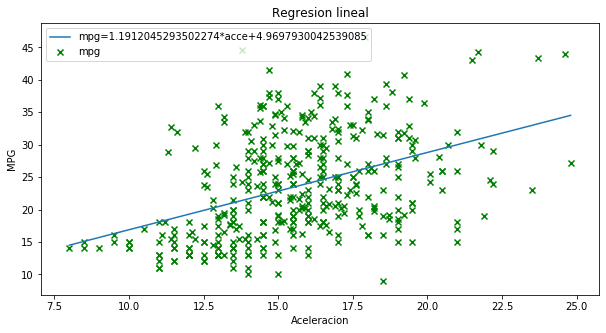

In [47]:
# plot

x=np.linspace(auto.acceleration.min(), auto.acceleration.max(), 50)
y=linreg[1]+linreg[0]*x

plt.figure(figsize=(10, 5))
plt.plot(x, y, label='mpg={}*acce+{}'.format(linreg[0], linreg[1]))
plt.scatter(auto.acceleration, auto.mpg, marker='x', c='g', label='mpg')

plt.title('Regresion lineal')
plt.xlabel('Aceleracion')
plt.ylabel('MPG')
plt.legend()
plt.show();

In [48]:
# linreg con statsmodels
import warnings
warnings.simplefilter('ignore')

x=sm.add_constant(auto.acceleration)
y=auto.mpg
modelo=sm.OLS(y, x).fit()

In [49]:
pred=modelo.predict(x)
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.177
Model:                            OLS   Adj. R-squared:                  0.175
Method:                 Least Squares   F-statistic:                     84.96
Date:                Wed, 22 Apr 2020   Prob (F-statistic):           1.82e-18
Time:                        16:25:17   Log-Likelihood:                -1343.9
No. Observations:                 398   AIC:                             2692.
Df Residuals:                     396   BIC:                             2700.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            4.9698      2.043      2.432      0.015       0.953       8.987
acceleration     1.1912      0.129      9.217      0.000       0.937       1.445
==============================================================================
Omnibus:                       17.459   Durbin-Watson:                   0.677
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               18.214
Skew:                           0.497   Prob(JB):                     0.000111
Kurtosis:                       2.670   Cond. No.                         91.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [50]:
# varias variables

x=sm.add_constant(auto[[
    #'acceleration',
    #'cylinders',
    'weight',
    'horse_power',
   # 'model_year',
   # 'displacement'
]].apply(lambda x: x.fillna(x.mean()))

)

y=auto.mpg

In [51]:
modelo=sm.OLS(y, x).fit()
pred=modelo.predict(x)
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.704
Model:                            OLS   Adj. R-squared:                  0.702
Method:                 Least Squares   F-statistic:                     469.1
Date:                Wed, 22 Apr 2020   Prob (F-statistic):          4.53e-105
Time:                        16:25:17   Log-Likelihood:                -1140.5
No. Observations:                 398   AIC:                             2287.
Df Residuals:                     395   BIC:                             2299.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          45.8415      0.790     58.047      0.000      44.289      47.394
weight         -0.0060      0.000    -12.034      0.000      -0.007      -0.005
horse_power    -0.0439      0.011     -3.990      0.000      -0.066      -0.022
==============================================================================
Omnibus:                       35.593   Durbin-Watson:                   0.839
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               45.770
Skew:                           0.687   Prob(JB):                     1.15e-10
Kurtosis:                       3.935   Cond. No.                     1.14e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.14e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [52]:
modelo.params

const          45.841518
weight         -0.005972
horse_power    -0.043904
dtype: float64

In [53]:
# version sklearn

#!pip3 install scikit-learn

In [54]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [55]:
auto=auto.dropna()
x=auto[[
    'acceleration',
    'cylinders',
    'weight',
    'horse_power',
    'model_year',
    'displacement'
]]

y=auto.mpg

In [56]:
modelo=LinearRegression(fit_intercept=True).fit(x,y)

In [57]:
pred=modelo.predict(x)

In [58]:
print (r2_score(y, pred))
print (modelo.coef_)
print (modelo.intercept_)

0.8092552890383932
[ 8.52732469e-02 -3.29859089e-01 -6.79461791e-03 -3.91355574e-04
  7.53367180e-01  7.67843024e-03]
-14.535250480506473


In [86]:
x=[10, 4, 3000, 150, 80, 320] # nuevos datos


b_n=[8.52732469e-02, -3.29859089e-01, -6.79461791e-03, -3.91355574e-04,
     7.53367180e-01, 7.67843024e-03]  # betas

b_0=-14.535250480506473


#prediccion
mpg=0

for i in range(len(x)):
    mpg+=x[i]*b_n[i]
    
mpg+=b_0


mpg

27.281960643193532

# Bayes

https://en.wikipedia.org/wiki/Thomas_Bayes

![bayes](data/bayes0.jpeg)

$$A \cap B = B \cap A$$

$$P(A \cap B) = P(B \cap A)$$

$$P(A|B) = \frac{P(A \cap B)}{P(B)}$$

### Regla de Bayes

$$P(A|B) = \frac{P(B|A)P(A)}{P(B)}$$

donde:

+ $P(A|B) :=$ A posteriori
+ $P(A) :=$ A priori
+ $P(B|A) :=$ Verosimilitud (likelihood)
+ $P(B) :=$ Marginal de B


En realidad:
$$P(B) = \sum_{\Omega} P(B|A)P(A)$$

# Ejemplo: Seguro de coche segun color

**Eventos**

+ $A: =$ Accidente de coche
+ $B: =$ Color del coche (rojo, por ejemplo)

**¿Que es cada cosa?**

+ $P(A|B) :=$ ¿Prob de tener un accidente si mi coche es rojo? (lo que buscamos)
+ $P(A) :=$ Prob de accidente (proporcion de coches accidentados en todo el parque movil)
+ $P(B|A) :=$ Si ya he tenido un accidente, ¿cual es la prob de que mi coche sea rojo? (proporcion de coches rojos entre los accidentados)
+ $P(B) :=$ Prob de coche rojo (proporcion de coches rojos en todo el parque movil)

**Supongamos...**
 
+ $P(A) = 0.1$ 
+ $P(B|A) = 0.3$ 
+ $P(B) = 0.2$


**Entonces..**

In [60]:
print ('P(A|B) = {}'.format(0.3*0.1/0.2))

P(A|B) = 0.15


**Conclusion**

La prob de tener un accidente si mi coche es rojo es de 0.15

...pero es extensible a distribuciones..

## Interpretación diacrónica de la regla de Bayes

**Supongamos..**

+ $A: =$ H (hipótesis)
+ $B: =$ D (datos)

Entonces:

$$P(H|D) = \frac{P(D|H)P(H)}{P(D)}$$

¿Que es $P(D)$?

$$P(D) = \sum_{\Omega} P(D|H)P(H)$$

**Solucion**

Se tienen dos hipótesis, H0 y H1:

$$\frac{P(H_1|D) = \frac{P(D|H_1)P(H_1)}{P(D)}}{P(H_0|D) = \frac{P(D|H_0)P(H_0)}{P(D)}}$$




$$\frac{P(H_1|D)}{P(H_0|D)} = \frac{P(D|H_1)P(H_1)}{P(D|H_0)P(H_0)}$$


Desde aqui solo hay que obtener ese cociente y ver si es mayor o menor que 1.

# Bayes Lab

### 1. Cookie Problem
Suppose we have two bowls of cookies. Bowl 1 contains 30 vanilla cookies and 10 chocolate cookies. Bowl 2 contains 20 of each. You randomly pick one cookie out of one of the bowls, and it is vanilla. Use Bayes Theorem to calculate the probability that the vanilla cookie you picked came from Bowl 1?

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [62]:
def bayes(priori, verosimilitud):                    # regla de Bayes
    marginal=sum(np.multiply(priori, verosimilitud))
    posteriori=np.divide(np.multiply(priori, verosimilitud), marginal)
    return posteriori

In [63]:
prioris=[1/2, 1/2]         # cuenco de galletas

v_vainilla=[3/4, 2/4]      # verosimilitud vainilla
v_chocolate=[1/4, 2/4]     # verosimilitud chocolate

In [64]:
print (bayes(prioris, v_vainilla)[0])
# 0.6 => 60% de probabilidad de que venga del cuenco de galletas 1.

0.6


What is the probability that it came from Bowl 2?

In [65]:
print (bayes(prioris, v_vainilla)[1])
print (1-bayes(prioris, v_vainilla)[0])
# 0.4 => 40% de probabilidad de que venga del cuenco de galletas 2.

0.4
0.4


What if the cookie you had picked was chocolate? What are the probabilities that the chocolate cookie came from Bowl 1 and Bowl 2 respectively?

In [66]:
print (bayes(prioris, v_chocolate))
# 0.333 => 33.3% de probabilidad de que venga del cuenco de galletas 1.
# 0.667 => 66.7% de probabilidad de que venga del cuenco de galletas 2.

[0.33333333 0.66666667]


### 2. Candy Problem
Suppose you have two bags of candies:

In **Bag 1**, the mix of colors is:
* Brown - 30%
* Yellow - 20%
* Red - 20%
* Green - 10%
* Orange - 10%
* Tan - 10%


In **Bag 2**, the mix of colors is:
* Blue - 24%
* Green - 20%
* Orange - 16%
* Yellow - 14%
* Red - 13%
* Brown - 13%




Not knowing which bag is which, you randomly draw one candy from each bag. One is yellow and one is green. What is the probability that the yellow one came from the Bag 1?

Hint: For the likelihoods, you will need to multiply the probabilities of drawing yellow from one bag and green from the other bag and vice versa.

In [67]:
prioris=[1/2, 1/2]         # bolsas

v_marron=[0.3, 0.13]       # verosimilitud marron
v_amarillo=[0.2, 0.14]     # verosimilitud amarillo
v_rojo=[0.2, 0.13]         # verosimilitud rojo
v_verde=[0.1, 0.2]         # verosimilitud verde
v_naranja=[0.1, 0.16]      # verosimilitud naranja
v_mandarina=[0.1, 0]       # verosimilitud mandarina
v_azul=[0, 0.24]           # verosimilitud azul

In [68]:
print (bayes(prioris, [v_amarillo[0]*v_verde[1], v_amarillo[1]*v_verde[0]])[0])
# 0.7407 => 74.1% de probabilidad de que la amarilla venga de la bolsa 1.

0.7407407407407408


What is the probability that the yellow candy came from Bag 2?

In [69]:
print (bayes(prioris, [v_amarillo[0]*v_verde[1], v_amarillo[1]*v_verde[0]])[1])
# 0.259 => 25.9% de probabilidad de que la amarilla venga de la bolsa 2.

0.25925925925925924


What are the probabilities that the green one came from Bag 1 and Bag 2 respectively?

Las probabilidades de la verde son las complementarias de cada una, es decir, la probabilidad de que la verde venga de la bolsa 1 es 0.259 y la probabilidad de que la verde venga de la bolsa 2 es 0.7407.

### 3. Monty Hall Problem
Suppose you are a contestant on the popular game show Let's Make a Deal. The host of the show (Monty Hall) presents you with three doors - Door A, Door B, and Door C. He tells you that there is a sports car behind one of them and if you choose the correct one, you win the car!

You select Door A, but then Monty makes things a little more interesting. He opens Door B to reveal that there is no sports car behind it and asks you if you would like to stick with your choice of Door A or switch your choice to Door C. Given this new information, what are the probabilities of you winning the car if you stick with Door A versus if you switch to Door C?

In [70]:
prioris=[1/3, 1/3, 1/3]         # puertas

v_premio=[0, 1/2, 1]            # verosimilitud del premio


print (bayes(prioris, v_premio)[1])
# si no se cambia de puerta la probabilidad es 1/3

print (bayes(prioris, v_premio)[2])
# si se cambia de puerta la probabilidad es 2/3

0.3333333333333333
0.6666666666666666


In [71]:
bayes(prioris, v_premio)

array([0.        , 0.33333333, 0.66666667])

# 4. Bayesian Analysis
Suppose you work for a landscaping company, and they want to advertise their service online. They create an ad and sit back waiting for the money to roll in. On the first day, the ad sends 100 visitors to the site and 14 of them sign up for landscaping services. Create a generative model to come up with the posterior distribution and produce a visualization of what the posterior distribution would look like given the observed data.

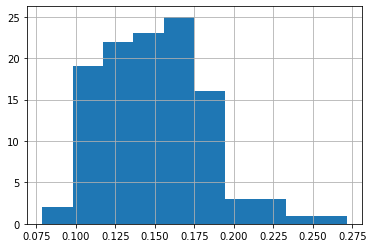

In [72]:
priori=pd.Series(np.random.uniform(0, 1, size=10000))    # distribucion a priori uniforme
sign_up=14                                               # 14 personas piden servicio


def modelo(param):                           # modelo binomial random
    res=np.random.binomial(100, param)       # se suponen 100 visitas
    return res


datos=[modelo(p) for p in priori]

posteriori=priori[list(map(lambda x: x==sign_up, datos))]   # se genera el a posteriori
posteriori.hist()
plt.show()

Produce a set of descriptive statistics for the posterior distribution.

In [73]:
print ('Se describe el a posteriori:')
print (posteriori.describe())

Se describe el a posteriori:
count    115.000000
mean       0.150307
std        0.034129
min        0.078774
25%        0.126135
50%        0.148452
75%        0.171530
max        0.271380
dtype: float64


What is the 90% credible interval range?

In [74]:
print('Rango intercuantil: ', posteriori.quantile(.05), '|', posteriori.quantile(.95))   
# rango intercuantil (90% de confianza)

Rango intercuantil:  0.10173252879014422 | 0.20602563082277808


What is the Maximum Likelihood Estimate?

In [75]:
modo=posteriori.round(2).mode()[0]      #redondeo para maxima verosimilitud proporcion de visitantes...
prob=list(posteriori.round(2)).count(modo)/len(posteriori.round(2))  # ....con probabilidad 
print('Estimación máximo-verosímil: ', modo, '|',prob)

Estimación máximo-verosímil:  0.17 | 0.13043478260869565


# Conjugado a priori

https://en.wikipedia.org/wiki/Conjugate_prior

https://en.wikipedia.org/wiki/Beta_distribution

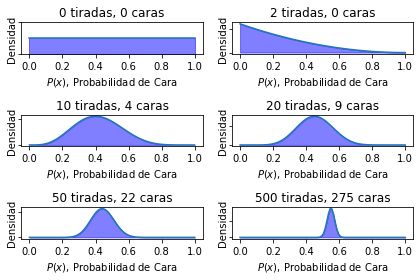

In [76]:
# tiros_de_moneda.py  (modelo beta-binomial)

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import bernoulli, beta               


tiradas=[0,2,10,20,50,500]    # lista del numero de intentos (experimentos de Bernoulli)
  
datos=bernoulli.rvs(0.5,size=tiradas[-1])   # se tiran 500 veces la moneda, 0-cruz, 1-cara (B(p,n))

x=np.linspace(0,1,100)  # espaciado lineal entre 0 y 1, 100 puntos, se discretiza el eje x


for i,N in enumerate(tiradas):  # se actualiza la informacion respecto al nº de tiradas, modelo beta-binomial (i actualizaciones , N tiradas)

    caras=datos[:N].sum()        # suma las caras que van saliendo
    ax=plt.subplot(len(tiradas)/2, 2, i+1)             # se crea un plot cada vez que se actualiza
    ax.set_title("%s tiradas, %s caras" % (N, caras))  # titulo  
    plt.xlabel("$P(x)$, Probabilidad de Cara")         # etiqueta x
    plt.ylabel("Densidad")                             # etiqueta y
    if i == 0:                                         # limite del eje y en el primer plot (0 tiradas)
        plt.ylim([0.0, 2.0])
    plt.setp(ax.get_yticklabels(), visible=False)      # quita los numeros del eje y
    y=beta.pdf(x, 1+caras, 1+N-caras)                  # se crea y se dibuja la distribucion beta que representa... (Beta(x,a,b))
    plt.plot(x,y)                                      # ... la creencia a posteriori de la perfeccion de la moneda (beta-binomial, bayesiano)
    plt.fill_between(x, 0, y, color='b', alpha=0.5)    # se rellena de color la distribucion 


plt.tight_layout()  # se expande el plot
plt.show();         # se plotea

# A/B testing bayesiano

In [77]:
from bayes_func import *

In [78]:
# los datos son conocidos: impresiones, conversiones, control y test
imps_ctrl, convs_ctrl= 16500, 30
imps_test, convs_test= 17000, 50

CR_ctrl=convs_ctrl/imps_ctrl
CR_test=convs_test/imps_test

print ('Tasas', CR_ctrl, CR_test)

Tasas 0.0018181818181818182 0.0029411764705882353


In [79]:
# se crean funciones beta
# aprioris

a_C, b_C = convs_ctrl+1, imps_ctrl-convs_ctrl+1
a_T, b_T = convs_test+1, imps_test-convs_test+1

beta_C=beta(a_C, b_C)  # control
beta_T=beta(a_T, b_T)  # test

In [80]:
# diferencia normalizada de las medias de test y control

salto=(beta_T.mean()-beta_C.mean())/beta_C.mean()  

In [81]:
prob=calc_prob(beta_T, beta_C)

In [82]:
print (
'''El test aumenta la tasa de conversion en un {:2.2f}%,
con una probabilidad del {:2.2f}%'''
    .format(salto*100, prob*100)
)

El test aumenta la tasa de conversion en un 59.68%,
con una probabilidad del 98.21%


0.0018181818181818182 0.0029411764705882353


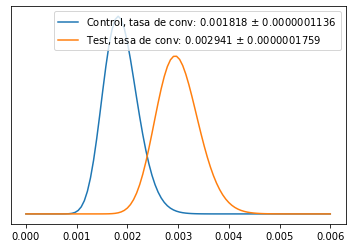

In [83]:
print (CR_ctrl, CR_test)
plot([beta_C, beta_T], ['Control', 'Test'])

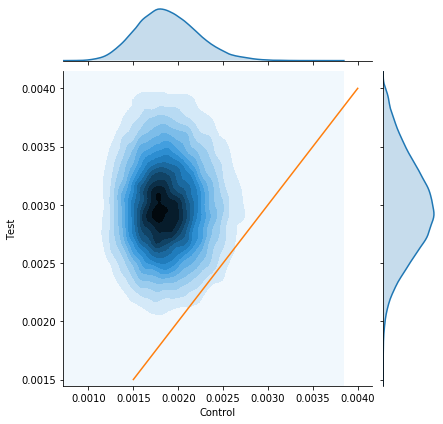

In [84]:
import seaborn as sns

val_C=np.random.beta(a_C, b_C, 50000)
val_T=np.random.beta(a_T, b_T, 50000)

vals=np.vstack([val_C, val_T]).T
limit=0.004

df=pd.DataFrame(vals, columns=['Control','Test'])
df=df[df.Control<limit]
df=df[df.Test<limit]


g=sns.jointplot(x=df.Control, y=df.Test, kind='kde', n_levels=15)
g.ax_joint.plot([0.0015, limit], [0.0015, limit])
plt.show();


### what if...? 

¿cual es la prob de que el test sea superior a 0.003 (CR)?

In [85]:
from mpmath import betainc   # integral de beta


p=betainc(a_T, b_T, 0.003, 1, regularized=True)

p

mpf('0.48112566853812544')